## Introduction

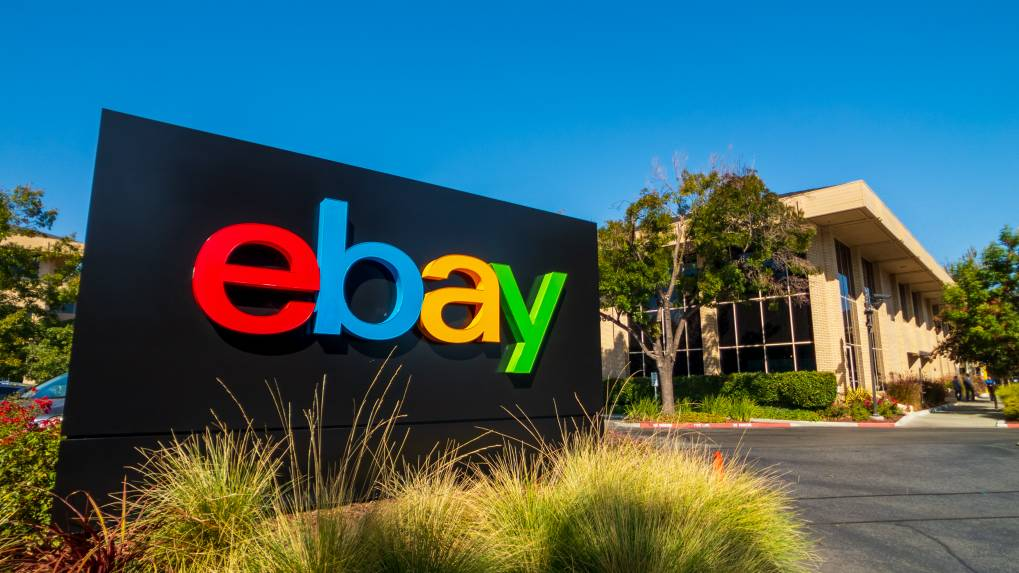

In [1]:
from IPython import display
display.Image("shutterstock_1501773125-b157be1ce3eada49.jpeg")

In this project, we will be working with a dataset of used cars from ebay Kleinanzeigen, a classifieds section of the German eBay website. Orignial dataset can be found [here](https://data.world/data-society/used-cars-data) 


### Data Dictionary
|Feature | Description|
|--------|--------|
|dateCrawled | When this ad was first crawled. All field-values are taken from this date.|
|name | Name of the car.|
|seller | Whether the seller is private or a dealer.|
|offerType | The type of listing|
|price | The price on the ad to sell the car.|
|abtest | Whether the listing is included in an A/B test.|
|vehicleType | The vehicle Type.|
|yearOfRegistration | The year in which the car was first registered.|
|gearbox | The transmission type.|
|powerPS | The power of the car in PS.|
|model | The car model name.|
|kilometer | How many kilometers the car has driven.|
|monthOfRegistration | The month in which the car was first registered.|
|fuelType | What type of fuel the car uses.|
|brand | The brand of the car.|
|notRepairedDamage | If the car has a damage which is not yet repaired.|
|dateCreated | The date on which the eBay listing was created.|
|nrOfPictures | The number of pictures in the ad.|
|postalCode | The postal code for the location of the vehicle.|
|lastSeenOnline | When the crawler saw this ad last online.|

## Objective
The aim of this project is to clean the data and analyze the included used car listings

## Importing Libraries 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [3]:
autos = pd.read_csv('autos.csv', encoding='Latin-1') 
# As default encoding 'UTF-8' did not work 

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
autos.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07
49999,2016-03-14 00:42:12,Opel_Vectra_1.6_16V,privat,Angebot,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,2016-03-13 00:00:00,0,45897,2016-04-06 21:18:48


In [6]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

### Overview of Statistical Summaries

In [7]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

Obsevations:
- There are 20 features (or Variables) in our dataset.
- While most of the features are of object dtype, few features such as `yearOfRegistration`, `powerPS`, `monthOfRegistration`, `nrOfPictures`,  and `postalCode` of of int64 dtype
- Columns `notRepairedDamage`, `fuelType, model`, `gearbox`, and `vehicleType` contain null values. At maximum, the missing values under 20% of its column.

---

Lets change the column names from __camel-type__ to more pythonic style, __snake-type__

In [8]:
# A dictionary containing replacements for each column name
cols = {'yearOfRegistration': 'registration_year', 
        'monthOfRegistration': 'registration_month',
       'notRepairedDamage': 'unrepaired_damage',
       'dateCreated': 'ad_created', 'dateCrawled':'date_crawled', 
       'vehicleType':'vehicle_type', 'gearbox':'gear_box', 
        'powerPS':'power_ps', 'fuelType':'fuel_type','nrOfPictures':
       'num_pictures', 'postalCode':'postal_code', 'lastSeen':
       'last_seen', 'offerType':'offer_type', 'abtest':'ab_test'}
autos = autos.rename(columns=cols)
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

---

## Data Exploration
Now let's do some basic data exploration to determine **what other cleaning tasks need to be done**. Initially we will look for:

- Text columns where all or almost all values are the same. These can often be dropped as they do not have useful information for analysis.
- Examples of numeric data stored as text which can be cleaned and converted.

In [9]:
autos.describe()

,registration_year,power_ps,registration_month,num_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [10]:
# We use argument include = 'all' to see all the columns, whether numeric dtype or not
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


#### Observations:
- There are two columns, i-e `seller` and `offer_type` that are made up of text and have just two unique values in each of them.
- `num_pictures` column is not showing expected behaivor. Thus requies further investigation.
- The columns of `price` and `odometer` are in string format. As they should have been in numerical format, we need to convert them into numerics to perform mathematical ops.


---

### Data Cleaning

Lets begin with cleaning the columns `odometer` and `price`

In [11]:
# remove chars 'km' and commas from odometer column
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','')

# change its name to more precise and correct its dtype
autos.rename({'odometer':'odometer_km'}, axis=1, inplace=True)
autos['odometer_km'] = autos['odometer_km'].astype(int)

In [12]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [13]:
# Remove chars such as '$' and commas from price column
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')

# Correct its dtype
autos['price'] = autos['price'].astype(int)

---

### Exploring Odometer and Price columns for Cleaning

Lets Analyze the columns using minimum and maximum values and look for any values that look unrealistically high or low (outliers) that we might want to remove

In [14]:
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [15]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [16]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

In [17]:
autos['odometer_km'].value_counts(normalize=True).sort_index(ascending=False)

150000    0.64848
125000    0.10340
100000    0.04338
90000     0.03514
80000     0.02872
70000     0.02460
60000     0.02328
50000     0.02054
40000     0.01638
30000     0.01578
20000     0.01568
10000     0.00528
5000      0.01934
Name: odometer_km, dtype: float64

- We can see that more than 64% of cars' odometer shows 150,000 kms traveled
- Around 2% of the cars have travelled around 5,000 km 

In [18]:
autos['price'].unique().shape

(2357,)

In [19]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

It can be seen in max and min descriptions that there are some unrealistic entries. Lets dig a bit deeper

In [20]:
autos['price'].value_counts().sort_index(ascending=False)

99999999       1
27322222       1
12345678       3
11111111       2
10000000       1
            ... 
5              2
3              1
2              3
1            156
0           1421
Name: price, Length: 2357, dtype: int64

In [21]:
autos['price'].value_counts().sort_index(ascending=True)

0           1421
1            156
2              3
3              1
5              2
            ... 
10000000       1
11111111       2
12345678       3
27322222       1
99999999       1
Name: price, Length: 2357, dtype: int64

Observations:

Odometer:
- Cars have odometer readings ranging from 5,000 to 150,000
- Around 64% of cars have an odometer reading of 150,000

Price:
- It can be seen that indeed there are some unrealistic values for the cars.
- We need to resolve the issue by removing such irrelavant entries 

In [22]:
# This will help us getting rid of prices less than 100 or more than 350,000
bool1 = (autos['price'] < 350000) & (autos['price'] >100) 

price_with_condition = autos.loc[bool1, 'price']
price_with_condition.describe()

count     48089.000000
mean       5939.462913
std        8949.391060
min         110.000000
25%        1250.000000
50%        3099.000000
75%        7500.000000
max      345000.000000
Name: price, dtype: float64

So in the cell shown above, we addressed the issue of unrealistic entries by considering only the prices that fall under the bracket of USD100.00 to USD350,000.00. Any values out of these bounds are not going to be considered anymore.

---

### Moving onto the date columns for Cleaning

For the sake of the reader, the columns with dates are shown in the table below.


|Columns with Date| Description|
| ------ | ------ |
|date_crawled| When this ad was first crawled. All field-values are taken from this date.|
|last_seen| When the crawler saw this ad last online.|
|ad_created| The date on which the eBay listing was created.|
|registration_month| The month in which the car was first registered.|
|registration_year| The year in which the car was first registered.|

In [23]:
# Know dtypes of each of the cols 
date_cols = ['date_crawled', 'last_seen','ad_created',
                 'registration_month','registration_year']
for col in date_cols:
    print(col,'-> ', autos[col].dtypes)

date_crawled ->  object
last_seen ->  object
ad_created ->  object
registration_month ->  int64
registration_year ->  int64


In [24]:
autos[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   last_seen           50000 non-null  object
 2   ad_created          50000 non-null  object
 3   registration_month  50000 non-null  int64 
 4   registration_year   50000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [25]:
autos[['date_crawled', 'last_seen', 'ad_created']].head()

,date_crawled,last_seen,ad_created
0,2016-03-26 17:47:46,2016-04-06 06:45:54,2016-03-26 00:00:00
1,2016-04-04 13:38:56,2016-04-06 14:45:08,2016-04-04 00:00:00
2,2016-03-26 18:57:24,2016-04-06 20:15:37,2016-03-26 00:00:00
3,2016-03-12 16:58:10,2016-03-15 03:16:28,2016-03-12 00:00:00
4,2016-04-01 14:38:50,2016-04-01 14:38:50,2016-04-01 00:00:00


In [26]:
autos[date_cols].iloc[-10:]

,date_crawled,last_seen,ad_created,registration_month,registration_year
49990,2016-03-21 19:54:19,2016-04-06 22:46:57,2016-03-21 00:00:00,12,2012
49991,2016-03-06 15:25:19,2016-03-06 18:24:19,2016-03-06 00:00:00,0,2016
49992,2016-03-10 19:37:38,2016-03-13 01:44:51,2016-03-10 00:00:00,9,2009
49993,2016-03-15 18:47:35,2016-04-06 19:46:53,2016-03-15 00:00:00,7,1997
49994,2016-03-22 17:36:42,2016-04-06 08:16:39,2016-03-22 00:00:00,1,2001
49995,2016-03-27 14:38:19,2016-04-01 13:47:40,2016-03-27 00:00:00,1,2011
49996,2016-03-28 10:50:25,2016-04-02 14:18:02,2016-03-28 00:00:00,5,1996
49997,2016-04-02 14:44:48,2016-04-04 11:47:27,2016-04-02 00:00:00,11,2014
49998,2016-03-08 19:25:42,2016-04-05 16:45:07,2016-03-08 00:00:00,11,2013
49999,2016-03-14 00:42:12,2016-04-06 21:18:48,2016-03-13 00:00:00,1,1996


In [27]:
autos['date_crawled'].str[:10]

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
            ...    
49995    2016-03-27
49996    2016-03-28
49997    2016-04-02
49998    2016-03-08
49999    2016-03-14
Name: date_crawled, Length: 50000, dtype: object

In [28]:
autos['date_crawled'][0]

'2016-03-26 17:47:46'

In [29]:
# lets strip the yyyy-mm-dd part only from the whole string and build a distribution table for it

def date_dist(string, head=True):
    ''' The function takes the desired string as first argument.
    The second argument controls the number of rows to be displayed
    
    
    Returns striped date to y-m-d and its distribution across the 
    column as percentage'''
    string = string.str[:10]
    string_v = string.value_counts(normalize=True, 
                                     dropna=False)
    string_val = string_v.sort_index()
    if head==True:
        return 100*string_val.head()
    else:
        return string_val*100


In [30]:
date_dist(autos['date_crawled'])

2016-03-05    2.538
2016-03-06    1.394
2016-03-07    3.596
2016-03-08    3.330
2016-03-09    3.322
Name: date_crawled, dtype: float64

In [31]:
date_dist(autos['ad_created'])

2015-06-11    0.002
2015-08-10    0.002
2015-09-09    0.002
2015-11-10    0.002
2015-12-05    0.002
Name: ad_created, dtype: float64

In [32]:
date_dist(autos['last_seen'])

2016-03-05    0.108
2016-03-06    0.442
2016-03-07    0.536
2016-03-08    0.760
2016-03-09    0.986
Name: last_seen, dtype: float64

In [33]:
# use Series.sort_index() for better exploration

In [34]:
date_dist(autos['date_crawled'], False).sort_index()

2016-03-05    2.538
2016-03-06    1.394
2016-03-07    3.596
2016-03-08    3.330
2016-03-09    3.322
2016-03-10    3.212
2016-03-11    3.248
2016-03-12    3.678
2016-03-13    1.556
2016-03-14    3.662
2016-03-15    3.398
2016-03-16    2.950
2016-03-17    3.152
2016-03-18    1.306
2016-03-19    3.490
2016-03-20    3.782
2016-03-21    3.752
2016-03-22    3.294
2016-03-23    3.238
2016-03-24    2.910
2016-03-25    3.174
2016-03-26    3.248
2016-03-27    3.104
2016-03-28    3.484
2016-03-29    3.418
2016-03-30    3.362
2016-03-31    3.192
2016-04-01    3.380
2016-04-02    3.540
2016-04-03    3.868
2016-04-04    3.652
2016-04-05    1.310
2016-04-06    0.318
2016-04-07    0.142
Name: date_crawled, dtype: float64

In [35]:
date_dist(autos['ad_created'], False).sort_index()

2015-06-11    0.002
2015-08-10    0.002
2015-09-09    0.002
2015-11-10    0.002
2015-12-05    0.002
              ...  
2016-04-03    3.892
2016-04-04    3.688
2016-04-05    1.184
2016-04-06    0.326
2016-04-07    0.128
Name: ad_created, Length: 76, dtype: float64

In [36]:
date_dist(autos['last_seen'], False).sort_index()

2016-03-05     0.108
2016-03-06     0.442
2016-03-07     0.536
2016-03-08     0.760
2016-03-09     0.986
2016-03-10     1.076
2016-03-11     1.252
2016-03-12     2.382
2016-03-13     0.898
2016-03-14     1.280
2016-03-15     1.588
2016-03-16     1.644
2016-03-17     2.792
2016-03-18     0.742
2016-03-19     1.574
2016-03-20     2.070
2016-03-21     2.074
2016-03-22     2.158
2016-03-23     1.858
2016-03-24     1.956
2016-03-25     1.920
2016-03-26     1.696
2016-03-27     1.602
2016-03-28     2.086
2016-03-29     2.234
2016-03-30     2.484
2016-03-31     2.384
2016-04-01     2.310
2016-04-02     2.490
2016-04-03     2.536
2016-04-04     2.462
2016-04-05    12.428
2016-04-06    22.100
2016-04-07    13.092
Name: last_seen, dtype: float64

##### Lets move to explore registration_year column for Cleaning

In [37]:
autos['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

#### Observations:
- By looking into min and max which are displaying years 1000 and 9999, we understand that the values need to be looked into further

- Any vehicle's registeration after the issue date of this listing has an inaccuate date.
- We will assume the earliest registration date to be around 1920s. It looks more realistic than 1000 A.D.

In [38]:
autos['registration_year'].astype(int)

0        2004
1        1997
2        2009
3        2007
4        2003
         ... 
49995    2011
49996    1996
49997    2014
49998    2013
49999    1996
Name: registration_year, Length: 50000, dtype: int32

In [39]:
autos['registration_year'].dtypes

dtype('int64')

In [40]:
# Lets see the percentage of the data that would be considered
autos['registration_year'].between(1920,2016).sum()/autos.shape[0]

0.96038

The remaining data after supposed cleaning is still around 96% of the total column.

In [41]:
# Apply the change on the whole DataFrame
autos = autos[autos['registration_year'].between(1920,2016)]
autos['registration_year'].describe()

count    48019.000000
mean      2002.820904
std          7.200279
min       1927.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [42]:
autos['registration_year'].value_counts(normalize=True, bins=10)

(1998.2, 2007.1]     0.522314
(2007.1, 2016.0]     0.251359
(1989.3, 1998.2]     0.197526
(1980.4, 1989.3]     0.015806
(1971.5, 1980.4]     0.006914
(1962.6, 1971.5]     0.004248
(1953.7, 1962.6]     0.001374
(1935.9, 1944.8]     0.000187
(1944.8, 1953.7]     0.000167
(1926.91, 1935.9]    0.000104
Name: registration_year, dtype: float64

In [43]:
autos['registration_year'].value_counts(normalize=True, bins=10).sort_index() # Sorting the above results

(1926.91, 1935.9]    0.000104
(1935.9, 1944.8]     0.000187
(1944.8, 1953.7]     0.000167
(1953.7, 1962.6]     0.001374
(1962.6, 1971.5]     0.004248
(1971.5, 1980.4]     0.006914
(1980.4, 1989.3]     0.015806
(1989.3, 1998.2]     0.197526
(1998.2, 2007.1]     0.522314
(2007.1, 2016.0]     0.251359
Name: registration_year, dtype: float64

**Observations:**
- More than 56% of the cars are of registerations during 1994-2005
- More than 35% of the cars are of registerations during 2005-2016
- So together, around **91%** of the cars are registered from 1994-2016

### Exploring price by brand column 

In [44]:
len(autos['brand'])

48019

In [45]:
autos['brand'].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [46]:
brand_dict = {}
for key in autos['brand']:
    if key in brand_dict:
        brand_dict[key] +=1
    else:
        brand_dict[key] = 1

In [47]:
brand_dict

{'peugeot': 1418,
 'bmw': 5284,
 'volkswagen': 10188,
 'smart': 668,
 'ford': 3352,
 'chrysler': 176,
 'seat': 873,
 'renault': 2273,
 'mercedes_benz': 4580,
 'audi': 4149,
 'sonstige_autos': 521,
 'opel': 5193,
 'mazda': 727,
 'porsche': 293,
 'mini': 415,
 'toyota': 599,
 'dacia': 123,
 'nissan': 725,
 'jeep': 108,
 'saab': 77,
 'volvo': 444,
 'mitsubishi': 391,
 'jaguar': 76,
 'fiat': 1242,
 'skoda': 770,
 'subaru': 105,
 'kia': 341,
 'citroen': 669,
 'chevrolet': 274,
 'hyundai': 473,
 'honda': 377,
 'daewoo': 72,
 'suzuki': 284,
 'trabant': 74,
 'land_rover': 98,
 'alfa_romeo': 318,
 'lada': 29,
 'rover': 65,
 'daihatsu': 123,
 'lancia': 52}

In [48]:
autos['brand'].value_counts(normalize=True).head(6)

volkswagen       0.212166
bmw              0.110040
opel             0.108145
mercedes_benz    0.095379
audi             0.086403
ford             0.069806
Name: brand, dtype: float64

In [49]:
autos['brand'].value_counts(normalize=True).head(6).sum()

0.6819383993835774

- Together the top 6 brands comprise of 68% of of the total brands
- So we will analyse top 6 brands as the rest of the brands are not in significant numbers 

In [50]:
common_brands = autos['brand'].value_counts(normalize=True).head(6).index.tolist()

common_brands

['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford']

### Conversion of commonly used words from German to English
To provide ease in further analysis, lets take categorical columns and translate the German words to English ones.
Following columns are addressed:
- `seller`
- `offer_type`
- `vehicle_type`
- `gear_box`
- `unrepaired_damage`

In [51]:
cat_cols = ['seller', 'offer_type', 'vehicle_type', 'gear_box', 'unrepaired_damage']
for col in cat_cols:
    print(autos[col].value_counts())

privat        48018
gewerblich        1
Name: seller, dtype: int64
Angebot    48018
Gesuch         1
Name: offer_type, dtype: int64
limousine     12859
kleinwagen    10820
kombi          9126
bus            4093
cabrio         3061
coupe          2536
suv            1986
andere          420
Name: vehicle_type, dtype: int64
manuell      35559
automatik    10044
Name: gear_box, dtype: int64
nein    34255
ja       4785
Name: unrepaired_damage, dtype: int64


In [52]:
german_to_english = {'nein':'no', 'ja':'yes', 'manuell':'manual', 'automatik':'automatic',
                    'andere':'other', 'suv':'suv', 'coupe':'coupe', 'cabrio':'convertible', 'kombi': 'combi', 'kleinwagen':'small car',
                    'Gesuch':'request', 'Angebot': 'services', 'gewerblich': 'commercial', 'privat':'private'}

In [68]:
autos[cat_cols] = autos[cat_cols].replace(german_to_english)

### Analysis of the top 6 brands 

#### Comparing Brands with mean Price

In [69]:
top_brands_price_dict = {}
for brand in common_brands:
    brands_only = autos[autos['brand'] == brand]
    mean_price = brands_only['price'].mean()
    top_brands_price_dict[brand] = int(mean_price)


In [70]:
top_brands_price_dict

{'volkswagen': 6516,
 'bmw': 8334,
 'opel': 5254,
 'mercedes_benz': 30317,
 'audi': 9093,
 'ford': 7263}

In [71]:
# Lets convert into a Series for better manipulation
top_brand_series = pd.Series(top_brands_price_dict)
top_brand_series.sort_values(ascending=False)

mercedes_benz    30317
audi              9093
bmw               8334
ford              7263
volkswagen        6516
opel              5254
dtype: int64

We can see that **Audi, BMW**, and **Mercedes-Benz** are the most expensive

#### Comparing Brands with mean Mileage

In [72]:
top_odometer_dict = {}
for brand in common_brands:
    brands_only = autos[autos['brand'] == brand]
    mean_odo = brands_only['odometer_km'].mean()
    top_odometer_dict[brand] = int(mean_odo)
    

In [73]:
top_odometer_dict

{'volkswagen': 128730,
 'bmw': 132434,
 'opel': 129228,
 'mercedes_benz': 130860,
 'audi': 129287,
 'ford': 124046}

In [74]:
top_odometer_series = pd.Series(top_odometer_dict)
top_odometer_series.sort_values(ascending=False)

bmw              132434
mercedes_benz    130860
audi             129287
opel             129228
volkswagen       128730
ford             124046
dtype: int64

There range of the mileage do not vary much with respect to the brand.

In [75]:
df = pd.DataFrame(top_brand_series, columns=['mean_price'])
df['mean_odokm'] = top_odometer_series
df = df.sort_values(by='mean_price', ascending=False)
df

,mean_price,mean_odokm
mercedes_benz,30317,130860
audi,9093,129287
bmw,8334,132434
ford,7263,124046
volkswagen,6516,128730
opel,5254,129228


## Finding the most popular model in each brand 

In [76]:
brand_model_dict = {}
brands = top_brand_series.index
for brand in brands:
    this_brand = autos[autos['brand'] == brand]
    its_model = this_brand['model'].value_counts()
    brand_model_dict[brand] = its_model.index[0]
brand_model_dict
common_model_series = pd.Series(brand_model_dict)


In [77]:
df['most_common_model'] = common_model_series
df

,mean_price,mean_odokm,most_common_model
mercedes_benz,30317,130860,c_klasse
audi,9093,129287,a4
bmw,8334,132434,3er
ford,7263,124046,focus
volkswagen,6516,128730,golf
opel,5254,129228,corsa


## Analysing impact of mileage of cars on their prices

In [78]:
mean_price_per_odo_slab = {}
odo_slabs = autos['odometer_km'].unique()
odo_slabs

for slab in odo_slabs:
    rows = autos[autos['odometer_km'] == slab]
    price = rows['price'].mean()
    mean_price_per_odo_slab[slab] = int(price)
mean_price_per_odo_slab

price_odo_slab_series = pd.Series(mean_price_per_odo_slab)
price_odo_slab_series.sort_index(ascending=False)


150000     7736
125000     6286
100000    12677
90000      8350
80000      9575
70000     10817
60000     12286
50000     25919
40000     49532
30000     16414
20000     17940
10000     19890
5000      12007
dtype: int64

The relationship of the cars' mileage and their prices in somewhat unclear. Though there is a overall decrease in prices as the mileage increases, but it is not decisive. It is apparent that other factors, apart from a car's mileage are contributing or even reversing the mileage's impact 

### How much cheaper are cars with damage than their non-damaged counterparts?

In [79]:
autos['unrepaired_damage'].value_counts(dropna=False)

no     34255
NaN     8979
yes     4785
Name: unrepaired_damage, dtype: int64

In [80]:
groupby_damage = autos.groupby(['unrepaired_damage']).mean()[['price','odometer_km']].round()
groupby_damage

,price,odometer_km
unrepaired_damage,,
no,8233.0,122993.0
yes,2335.0,135340.0


In [81]:
groupby_damage['price'][0]/groupby_damage['price'][1]

3.5259100642398287

- In general, a car without unrepaired damage is 3.5 times more expensive than a car with unrepaired damages


In [82]:
autos[autos['brand'].isin(common_brands)].groupby(['brand','unrepaired_damage']).mean()[['price','odometer_km']].round()

price  odometer_km
brand         unrepaired_damage                      
audi          no                 10764.0     125729.0
              yes                 3181.0     142371.0
bmw           no                  9322.0     131113.0
              yes                 3277.0     141181.0
ford          no                 10110.0     121475.0
              yes                 1312.0     134447.0
mercedes_benz no                  9712.0     129455.0
              yes                 3865.0     139799.0
opel          no                  7192.0     127122.0
              yes                 1299.0     134494.0
volkswagen    no                  6375.0     125868.0
              yes                 3137.0     137957.0

**Observations:**
- The largest discrepency between the prices of such cars is in Ford and Opel.
- On contrary the least difference is in Volkswagen
- Though mileage seems to be higher in the cars with unrepairable damages, but the difference is almost insignificant


## Conclusions:
- There is almost no relation between mileage and price among the top brands
- More than 90% of the cars were registered after 1994
- Volkswagen, BMW, Opel, Mercedes_benz, Audi, and Ford are the most common brands 
- Mercedes Benz is not only the most expensive car but outlandishly expensive as well